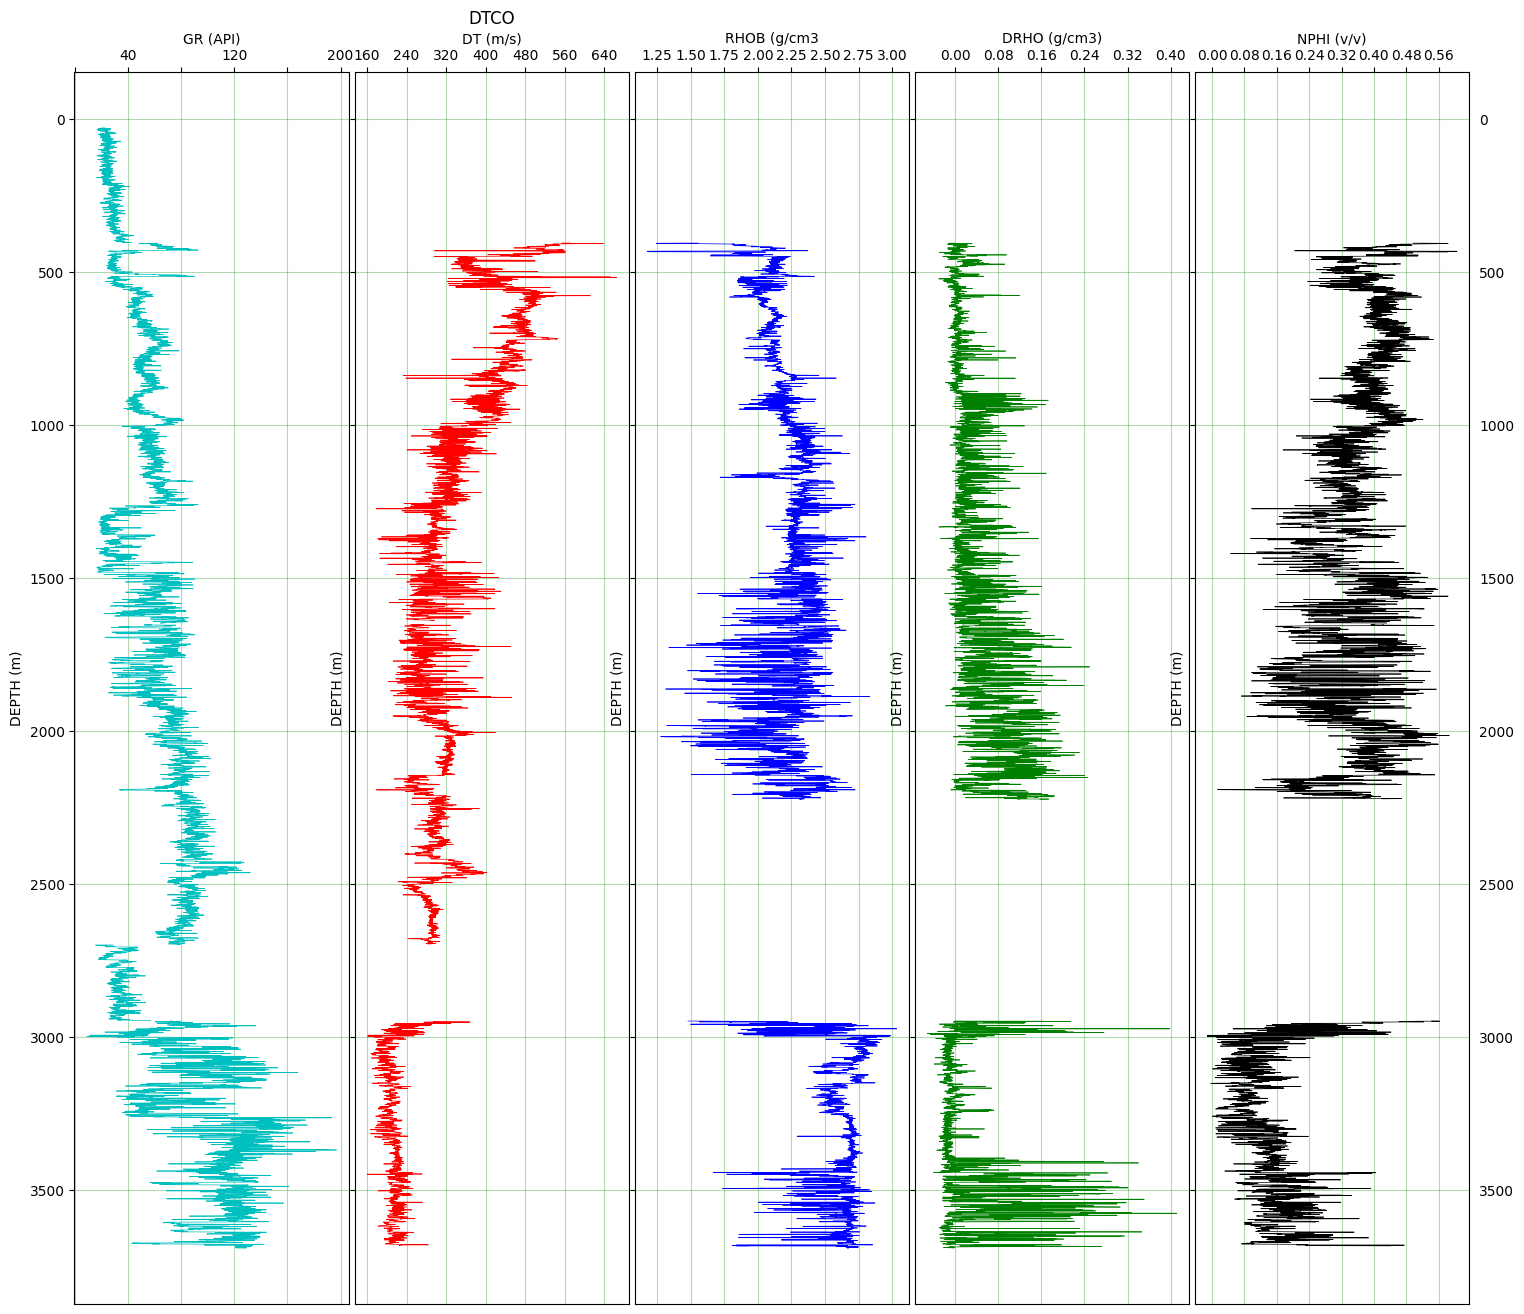

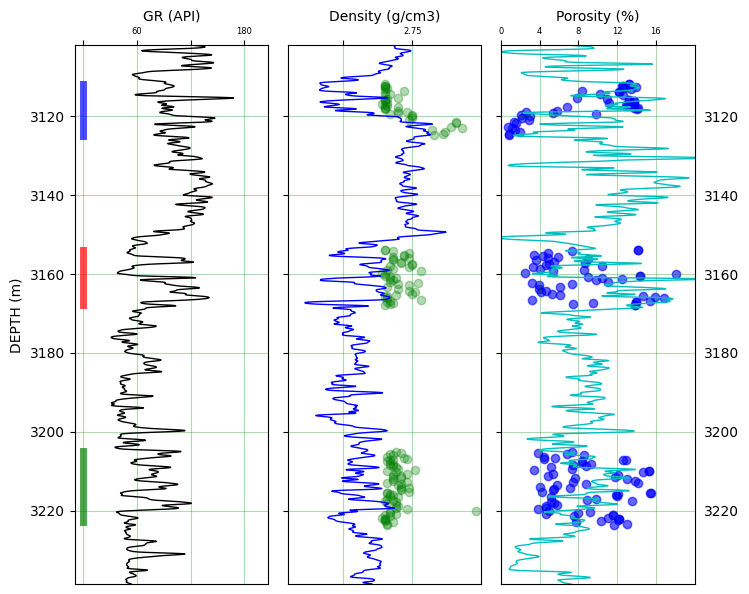

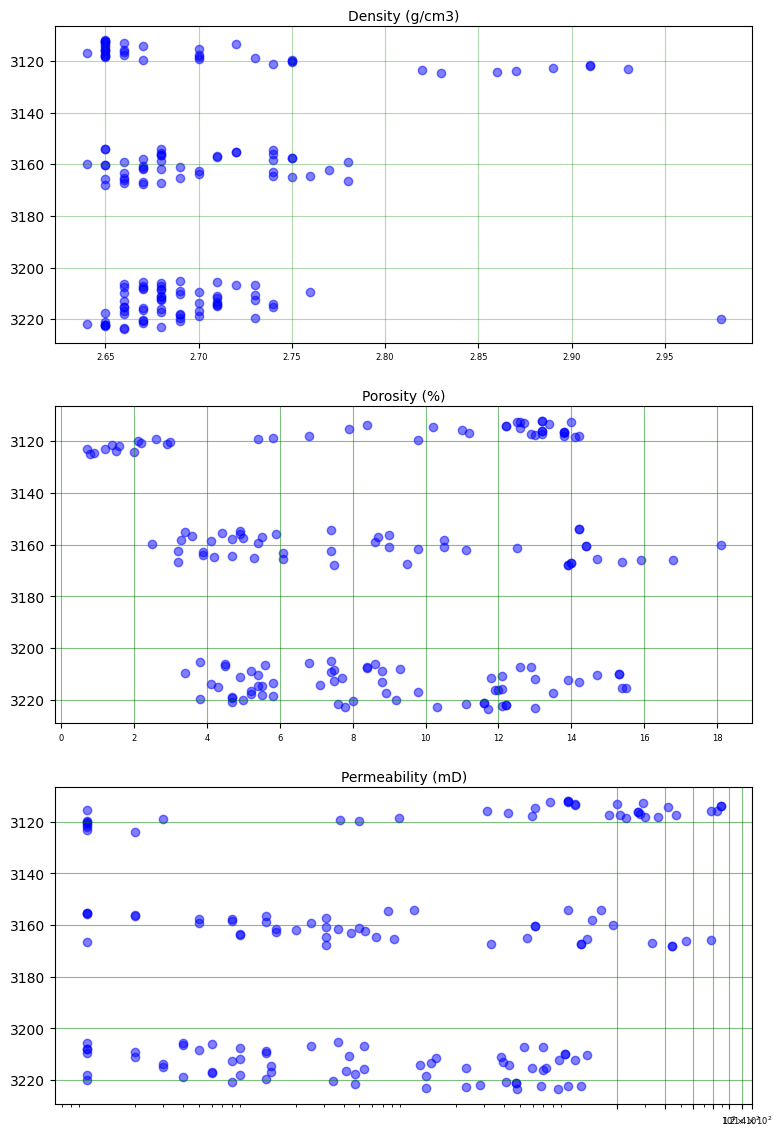

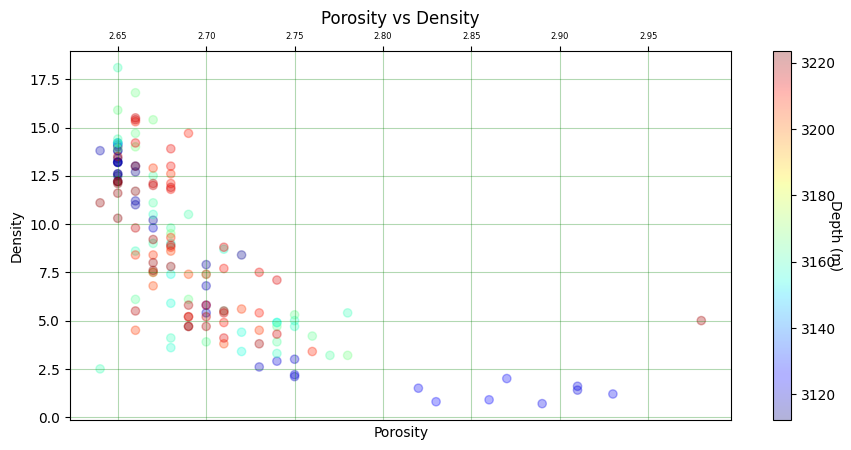

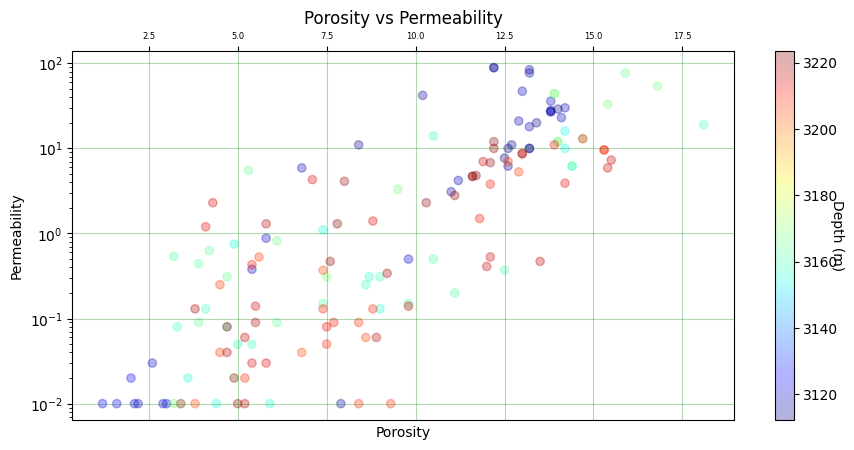

In [1]:
import petrophys
from petrophys.visualization import visualize
import lasio
import os
import numpy as np    
import pandas as pd  

lasfile = lasio.read(os.path.join("../data/raw/logs/2571_cap01_1985_comp.las"))

visualize.well_curve(lasfile)

# Reading the .csv file containinig experimental petrophysical measurements 
km = pd.read_csv('../data/raw/cores/CAP-01_kernmetingen.csv')

# Converting '-' into Nan and removing outliers
km2= visualize.valtonan(km, val='-')
km2= visualize.valtonan(km, val='0.66')
den2=km2['Korreldichtheid (g/cm³)']
dd2 = np.array(den2.values, dtype=float)
np.nanmin(dd2), np.nanmax(dd2)

# Reading the .csv file containing depths and properties measured on cores 
cores = pd.read_csv('../data/raw/cores/CAP-01_cores.csv')

# We are making an array of top and bottom depths to plot the core intervals (m)
# (x1, x2), (bottom, top), 'color'
c = [(0, 0), (cores['Bottom'][0], cores['Top'][0]), 'b',
     (0, 0), (cores['Bottom'][1], cores['Top'][1]), 'r', 
     (0, 0), (cores['Bottom'][2], cores['Top'][2]), 'g']

visualize.petro_measure_curve(lasfile, km, dd2, c)

por2=km2['Porositeit (%)']
p2 = np.array(por2.values, dtype=float)
np.nanmin(p2), np.nanmax(p2)

perm2=km2['hor. Perm (mD)']
p3 = np.array(perm2.values, dtype=float)
np.nanmin(p3), np.nanmax(p3)

visualize.depth_intervals_cores(km, dd2, p2, p3)

visualize.depth_intervals_porosity(km, dd2, p2, 'Porosity', 'Density', 'Porosity vs Density', 'linear')
visualize.depth_intervals_porosity(km, p2, p3, 'Porosity', 'Permeability', 'Porosity vs Permeability', 'log')
